****VGGNet_2014를 텐서플로우2(2.4.1)로 구현해보기****

depth가 커질수록 정확도 증가?

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

논문에서는 1000개의 레이블이 있는 이미지 130만개 훈련데이터, 5만개 VC, 천만개 test 데이터로 사용

cifar100을 이용하기(RGB사용하는 32x32 이미지들)

In [2]:
from tensorflow.keras.datasets import cifar100
# cifar 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


데이터 한번 봐보기

C:\Users\jpPark\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


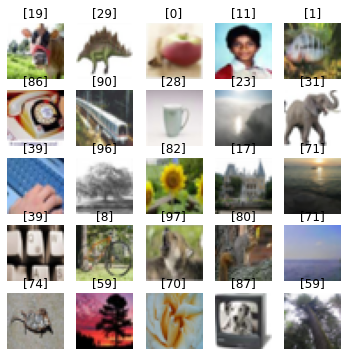

In [3]:
import matplotlib.pyplot as plt
 # 25개만 출력하기
plt.figure(figsize=(6,6))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')
plt.show()

**데이터 전처리**

논문에서는 이미지에서 그 부분을 랜덤으로 여러개 224x224 크기로 crop해서 이용(이 때 여러 이미지 생성 가능*(한 부분만 보여준다던지...)*)

이것을 통해서 더 많은 train_data 확보 -> 정확도 상승!


In [4]:
# 픽셀(0 ~ 255) 데이터 0 ~ 1사이로 맞추기
#x_train= (x_train - 0.0)/(255.0 - 0.0)
#x_test = (x_test - 0.0)/(255.0 - 0.0)

**모델 구축**

학습파라미터의수 = 입력채널수X필터폭X필터높이X출력채널수

Conv층에 따른 shape변화: Row(Column)Size = (N-F+1)/stride(*하지만 패딩으로 인해 불변*)

Pooling층에 따른 shape변화: Row(Column)Size = (N)/P

conv3-64 : 3x3의 필터를 64개를 사용

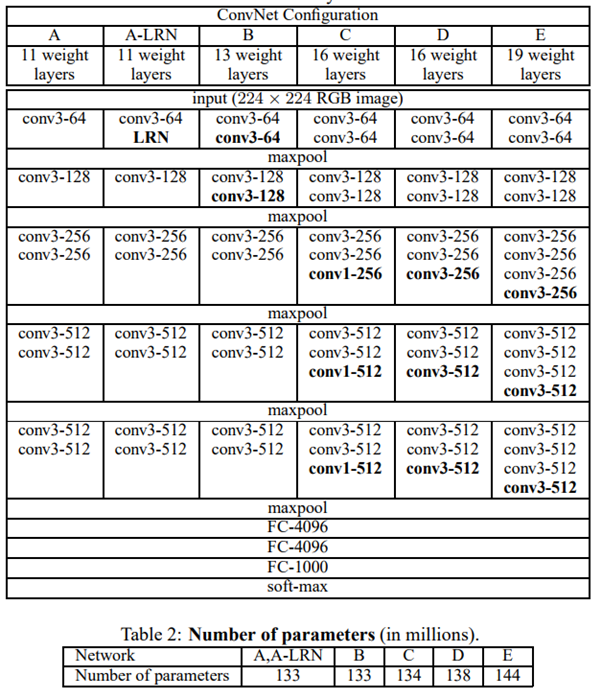

In [5]:
# 32X32 크기의 이미지여서 모든 채널의 갯수를 감소시켰습니다.(각 행의 주석과는 다른 수치가 들어가 있음)

mdA = tf.keras.Sequential()                                                                               # 11개의 layer를 가진 모델   
mdA.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3),padding='SAME'))                   # train_x의 shape대로 넣어준다(레이어가 많아서 패딩 필수!), filter= 3x3, outputchannel= 64
mdA.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdA.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 128
mdA.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdA.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 256
mdA.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 256
mdA.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdA.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 512
mdA.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 512
mdA.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdA.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 512
mdA.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 512
mdA.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdA.add(tf.keras.layers.Flatten())
mdA.add(tf.keras.layers.Dense(1024, activation='relu'))                                                   # 유닛 4096개의 완전연결층
mdA.add(tf.keras.layers.Dense(1024, activation='relu'))                                                   # 유닛 4096개의 완전연결층
mdA.add(tf.keras.layers.Dense(100, activation='relu'))                                                   # 유닛 4096개의 완전연결층
mdA.add(tf.keras.layers.Dense(100, activation='softmax'))                                                 # 정답의 개수가 100개여서 출력층에 100개 넣기

# 모델 컴파일
mdA.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
              loss= 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
mdA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0

e모델 구축 및 컴파일

In [6]:
# 32X32 크기의 이미지여서 모든 채널의 갯수를 감소시켰습니다.(각 행의 주석과는 다른 수치가 들어가 있음)

mdE = tf.keras.Sequential()                                                                               # 11개의 layer를 가진 모델   
mdE.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3),padding='SAME'))                   # train_x의 shape대로 넣어준다(레이어가 많아서 reshape 필수!), filter= 3x3, outputchannel= 64
mdE.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu',padding='SAME'))
mdE.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdE.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 128
mdE.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='SAME'))
mdE.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdE.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 256
mdE.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 256
mdE.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='SAME'))
mdE.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='SAME'))
mdE.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdE.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 512
mdE.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 512
mdE.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))
mdE.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))
mdE.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdE.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 512
mdE.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))                  # train_x의 shape대로 넣어준다, filter= 3x3, outputchannel= 512
mdE.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))
mdE.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='SAME'))
mdE.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
mdE.add(tf.keras.layers.Flatten())
mdE.add(tf.keras.layers.Dense(128, activation='relu'))                                                   # 유닛 4096개의 완전연결층
mdE.add(tf.keras.layers.Dense(128, activation='relu'))                                                   # 유닛 4096개의 완전연결층
mdE.add(tf.keras.layers.Dense(100, activation='relu'))                                                   # 유닛 4096개의 완전연결층
mdE.add(tf.keras.layers.Dense(100, activation='softmax'))                                                 # 정답의 개수가 100개여서 출력층에 100개 넣기

# 모델 컴파일
mdE.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
              loss= 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
mdE.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)         

**모델 학습**

In [7]:
histA = mdA.fit(x_train, y_train, epochs = 5, validation_split=0.1)


Epoch 1/30


In [29]:
# 모델 평가
mdA.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 3.8563 - accuracy: 0.2993


[3.8562722206115723, 0.2992999851703644]

Epoch 1/10
 111/1407 [=>............................] - ETA: 55s - loss: 4.6054 - accuracy: 0.0101

KeyboardInterrupt: 